In [56]:
import numpy as np
import matplotlib.pyplot as plt





class Particula:
    def __init__(self, pos, vel, masa=1, radio=1):
        self.pos = np.array(pos, dtype=np.float64)
        self.vel = np.array(vel, dtype=np.float64)
        self.masa = masa
        self.radio = radio
        self.fuerza = np.zeros(3, dtype=np.float64)
    
    def mover(self, dt):
        self.vel += (self.fuerza / self.masa) * dt
        self.pos += self.vel * dt
    
    def rebotar_paredes(self):
        for i in range(3):
            if self.pos[i] < self.radio:
                self.pos[i] = self.radio
                self.vel[i] *= -1
            elif self.pos[i] > L - self.radio:
                self.pos[i] = L - self.radio
                self.vel[i] *= -1
    
    def rebotar_particula(self, otra):
        r = otra.pos - self.pos
        d = np.linalg.norm(r)
        if d < self.radio + otra.radio:
            n = r / d
            dv = self.vel - otra.vel
            j = 2 * np.dot(dv, n) / (1/self.masa + 1/otra.masa)
            self.vel -= j * n / self.masa
            otra.vel += j * n / otra.masa
            overlap = (self.radio + otra.radio - d) * 0.5
            self.pos -= overlap * n
            otra.pos += overlap * n

def generar_posiciones(N, m_min, m_max, r_min, r_max, v_min, v_max):
    particulas = []
    i = 0


    while i < N:
        masa= np.random.uniform(m_min, m_max)   #Rango de masas
        radio   = np.random.uniform(r_min, r_max) #Rango de radios
        pos = np.array(np.random.uniform(radio, L - radio, 3)) #Rango de posiciones, no cambiar
        vel = np.random.uniform(v_min, v_max, 3) #Rango de velocidades
        nueva = Particula(pos, vel, masa, radio) 
        if all(np.linalg.norm(nueva.pos - p.pos) > (nueva.radio + p.radio) for p in particulas):
            particulas.append(nueva)
            i += 1
    return particulas


# Parámetros
L = 1        #Lado del cubo
dt = 0.01    #Cambio del tiempo 
N = 4       # Número de partículas
t = 10       #Tiempo de simulación 
m_min = 25  #Masa minima
m_max = 50  #Masa maxima
r_min = 0.01  #Radio minimo
r_max = 0.2   #Radio maximo
v_min = 1   #Velocidad minima
v_max = 0.01  #Velocidad maxima




#Main

particulas = generar_posiciones(N, m_min, m_max, r_min, r_max, v_min, v_max)
print("particulas generadas")
posiciones = np.array([p.pos for p in particulas])
T = 0
while T < t:
    for p in particulas:
        p.mover(dt)

    for p in particulas:
        p.rebotar_paredes()

    for i in range(N):
        for j in range(i+1, N):
            particulas[i].rebotar_particula(particulas[j])

    posiciones = np.vstack([posiciones, np.array([p.pos for p in particulas])])

    T += dt
    
    
histo, edges =np.histogramdd(posiciones, bins=(int(20), int(20), int(20)))
print("Listo para graficar.")


particulas generadas
Listo para graficar.


<IPython.core.display.Javascript object>


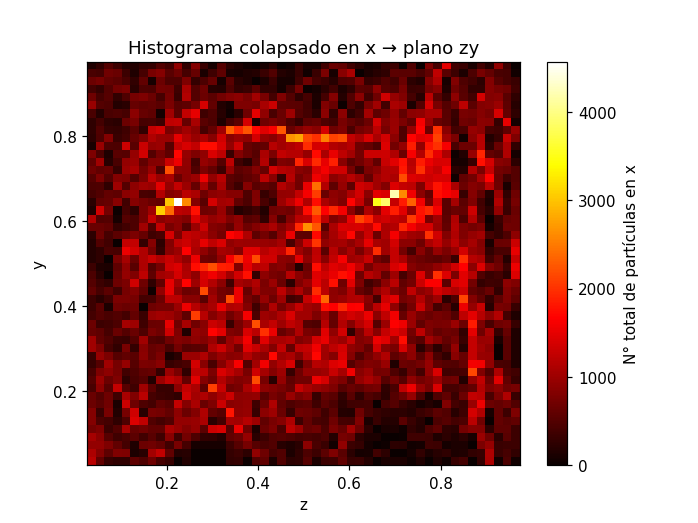

In [37]:


histo_zy = histo.sum(axis=0)          # ∑ en x   →  matriz (ny, nz)

plt.imshow(
    histo_zy,                         # filas → y, columnas → z
    origin="lower",
    extent=[edges[2][0], edges[2][-1],   # eje horizontal: z
            edges[1][0], edges[1][-1]],  # eje vertical  : y
    cmap="hot",
    aspect="auto"
)
plt.colorbar(label="N° total de partículas en x")
plt.xlabel("z")
plt.ylabel("y")
plt.title("Histograma colapsado en x → plano zy")
plt.show()


<IPython.core.display.Javascript object>


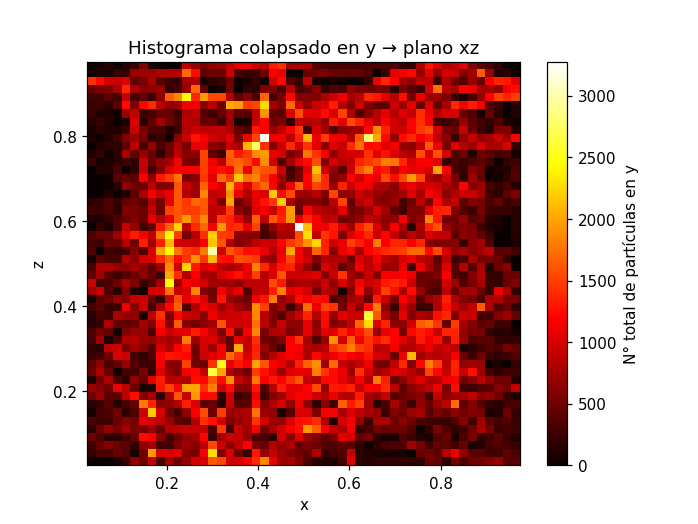

In [38]:
histo_xz = histo.sum(axis=1)         # integra sobre y; usa .mean(axis=1) si prefieres promedio

plt.imshow(
    histo_xz.T,                      # .T para que x quede horizontal
    origin="lower",
    extent=[edges[0][0], edges[0][-1],  # eje x (horizontal)
            edges[2][0], edges[2][-1]], # eje z (vertical)
    cmap="hot",
    aspect="auto"
)
plt.colorbar(label="N° total de partículas en y")
plt.xlabel("x")
plt.ylabel("z")
plt.title("Histograma colapsado en y → plano xz")
plt.show()

<IPython.core.display.Javascript object>


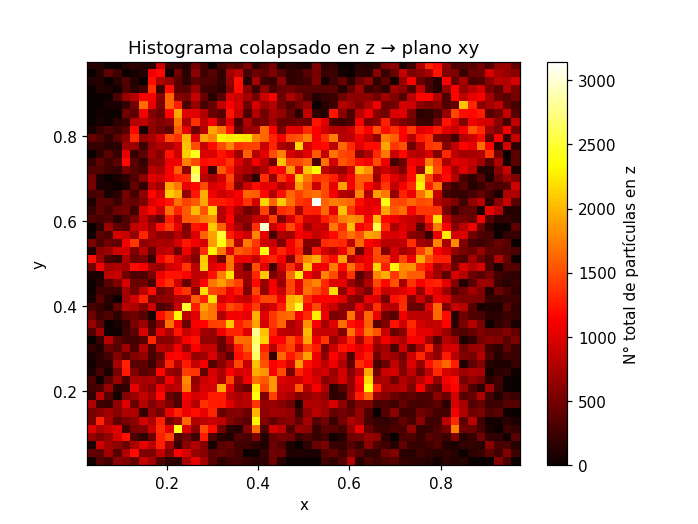

In [39]:
histo_xy = histo.sum(axis=2)        # ó histo.mean(axis=2) si prefieres el promedio

plt.imshow(
    histo_xy.T,                     # .T para que x vaya horizontal
    origin="lower",
    extent=[edges[0][0], edges[0][-1], edges[1][0], edges[1][-1]],
    cmap="hot",
    aspect="auto"
)
plt.colorbar(label="N° total de partículas en z")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Histograma colapsado en z → plano xy")
plt.show()

<IPython.core.display.Javascript object>


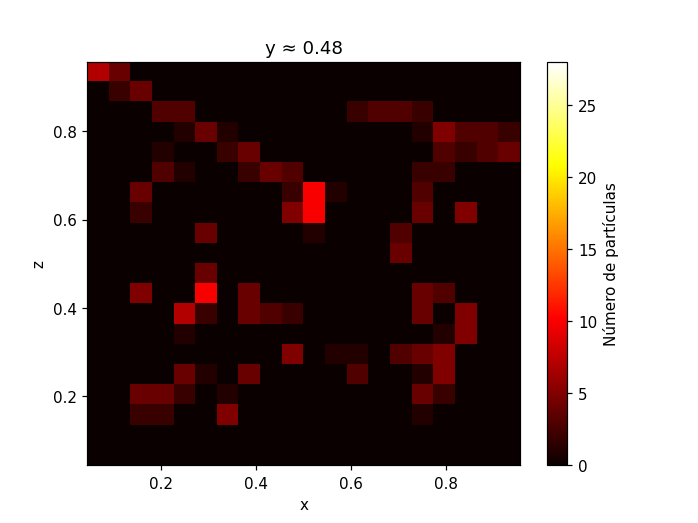

In [52]:
from matplotlib.animation import FuncAnimation, writers
%matplotlib notebook

nx, ny, nz = histo.shape

fig, ax = plt.subplots()
im = ax.imshow(
    histo[:, 0, :].T,                 
    origin="lower",
    extent=[edges[0][0], edges[0][-1], edges[1][0], edges[1][-1]],
    cmap="hot",
    aspect="auto",
    animated=True                    
)
cbar = fig.colorbar(im, ax=ax, label="Número de partículas")
ax.set_xlabel("x")
ax.set_ylabel("z")
title = ax.set_title("y ≈ 0")

# --- Función que actualiza cada cuadro ---
def update(frame):
    im.set_data(histo[:, frame, :].T)               
    z_mid = 0.5 * (edges[2][frame] + edges[2][frame + 1])
    title.set_text(f"y ≈ {z_mid:.2f}")
    return im, title

# --- Crear la animación ---
anim = FuncAnimation(
    fig,
    update,
    frames=ny,          
    interval=100,       
    blit=True
)

plt.show()

<IPython.core.display.Javascript object>


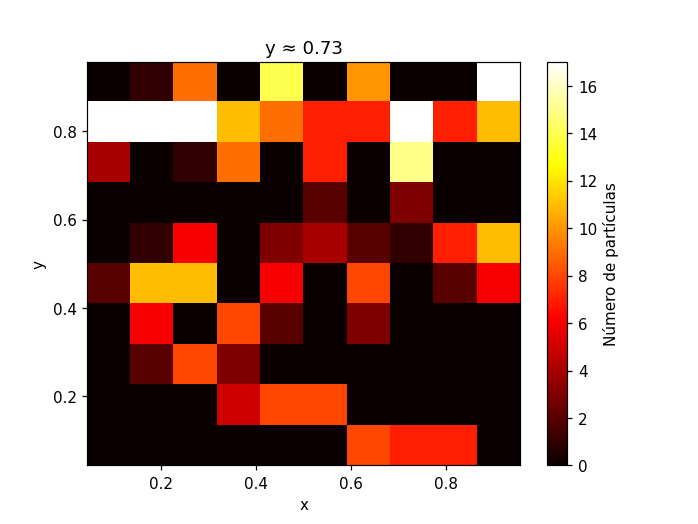

In [51]:
fig, ax = plt.subplots()
im = ax.imshow(
    histo[:, :, 0].T,                 
    origin="lower",
    extent=[edges[0][0], edges[0][-1], edges[1][0], edges[1][-1]],
    cmap="hot",
    aspect="auto",
    animated=True                    
)
cbar = fig.colorbar(im, ax=ax, label="Número de partículas")
ax.set_xlabel("x")
ax.set_ylabel("y")
title = ax.set_title("z ≈ 0")

# --- Función que actualiza cada cuadro ---
def update(frame):
    im.set_data(histo[:, :, frame].T)               
    z_mid = 0.5 * (edges[2][frame] + edges[2][frame + 1])
    title.set_text(f"y ≈ {z_mid:.2f}")
    return im, title

# --- Crear la animación ---
anim = FuncAnimation(
    fig,
    update,
    frames=nz,         
    interval=100,       
    blit=True
)

plt.show()

<IPython.core.display.Javascript object>


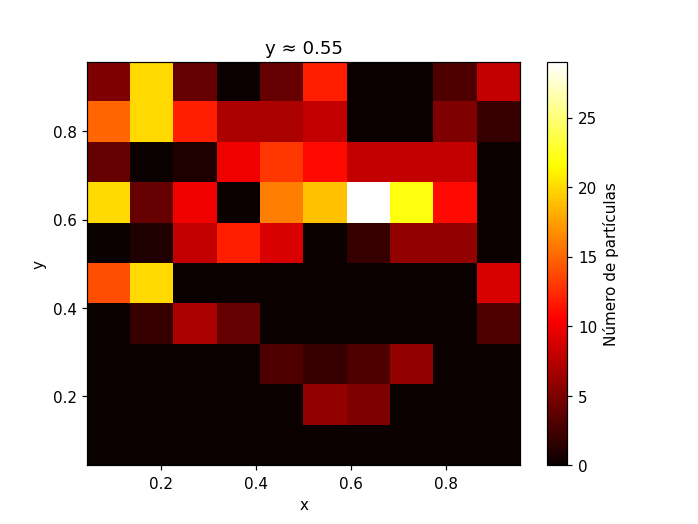

In [50]:
fig, ax = plt.subplots()
im = ax.imshow(
    histo[0, :, :].T,                 
    origin="lower",
    extent=[edges[0][0], edges[0][-1], edges[1][0], edges[1][-1]],
    cmap="hot",
    aspect="auto",
    animated=True                    
)
cbar = fig.colorbar(im, ax=ax, label="Número de partículas")
ax.set_xlabel("x")
ax.set_ylabel("y")
title = ax.set_title("z ≈ 0")

# --- Función que actualiza cada cuadro ---
def update(frame):
    im.set_data(histo[frame, :, :].T)               
    z_mid = 0.5 * (edges[2][frame] + edges[2][frame + 1])
    title.set_text(f"y ≈ {z_mid:.2f}")
    return im, title

# --- Crear la animación ---
anim = FuncAnimation(
    fig,
    update,
    frames=nx,         
    interval=100,       
    blit=True
)

plt.show()